# CS 109A/AC 209A/STAT 121A Data Science: Final Project
**Harvard University**<br>
**Fall 2016**<br>
**Instructors:** W. Pan, P. Protopapas, K. Rader<br>
**Members: ** Shawn Pan, Xinyuan (Amy) Wang, Ming-long Wu

## Remark ##
- Code to perform sentiment analysis on review text and visualize sentiment.
- We used the VADER (Valence Aware Dictionary and sEntiment Reasoner), because it can detect sentiment without requiring a marked training set.

Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

In [1]:
import pandas as pd
import numpy as np

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read data
reviews_cleaned = pd.read_csv("../../Data/reviews_cleaned.csv")
reviews_cleaned[::20000]

,listing_id,id,date,reviewer_id,reviewer_name,comments,if_English
0,1180670,14705995,2014-06-24,10875598,Gregory,"Ok, if you like the location and don't mind an...",True
20000,402201,1578928,2012-06-27,2251260,Dave,The reservation was canceled 183 days before a...,True
40000,1264732,8209665,2013-10-21,6651045,Ali,Jeffrey is a great host with his amazing promp...,True
60000,816272,4199429,2013-04-17,5788289,Dan,"I booked Cristen's apartment for my parents, a...",True
80000,237127,7634863,2013-09-27,8941981,Margaret,I can't recommend this host highly enough. Ex...,True
100000,51572,2920854,2012-11-19,1135476,Mark,"Lee was an excellent host--friendly, easy-goin...",True
120000,62452,1209986,2012-05-01,1998800,Ksenia,Everithyng is as seen on the pictures. A littl...,True
140000,2825271,14965973,2014-06-30,1209578,Claire,"thant you very much to Olivia and her husband,...",True
160000,869069,8233008,2013-10-21,9269393,Marian,My son and I stayed one night in Hinanit's apa...,True
180000,26969,8993097,2013-12-01,3637845,Charles,"Great neighborhood, fun house and very conveni...",True


In [42]:
#may need to download required data
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [20]:
sid = SentimentIntensityAnalyzer()
review_comments = reviews_cleaned["comments"]

#try looking at full comments and individual sentences within comments
for i in range(10):
    comment = review_comments.iloc[i]
    for sent in tokenize.sent_tokenize(comment):
        print sent
        print sid.polarity_scores(sent)
    print "Overall"
    print sid.polarity_scores(comment)
    print

Ok, if you like the location and don't mind an occasional roach.
{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.5719}
Overall
{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.5719}

Extremely disappointed.
{'neg': 0.772, 'neu': 0.228, 'pos': 0.0, 'compound': -0.5256}
Overall
{'neg': 0.772, 'neu': 0.228, 'pos': 0.0, 'compound': -0.5256}

Exactly as described.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Overall
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

The reservation was canceled the day before arrival.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
This is an automated posting.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Overall
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Very Nice and comfortable.
{'neg': 0.0, 'neu': 0.231, 'pos': 0.769, 'compound': 0.7688}
Great location - Marianne and Son ensured we had a comfortable stay.
{'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.8126}
Overall
{'neg': 0.0, 'neu': 0.411, 'pos'

It appears that applying the VADER analyzer to the entire comments is a reasonable average of the sentences.

In [52]:
#find review sentiments with VADER algorithm
#neg, neu, pos, compound
reviews["sentiment"] = reviews["comments"].apply(lambda c: sid.polarity_scores(c).values())
reviews["negative_sentiment"] = reviews["sentiment"].apply(lambda s: s[0])
reviews["neutral_sentiment"] = reviews["sentiment"].apply(lambda s: s[1])
reviews["positive_sentiment"] = reviews["sentiment"].apply(lambda s: s[2])
reviews["compound_sentiment"] = reviews["sentiment"].apply(lambda s: s[3])

review_sentiments = reviews[["listing_id", "positive_sentiment", "negative_sentiment", 
                             "neutral_sentiment", "compound_sentiment"]]

review_sentiments.to_csv('../../Data/reviews_sentiment.csv', sep=',', index = False)

# Visualization

In [4]:
#read from saved sentiment file, as VADER takes a long time to run for all reviews
review_sentiments = pd.read_csv("../../Data/reviews_sentiment.csv")

In [26]:
#average sentiment across multiple reviews
sentiments_by_id = review_sentiments.groupby("listing_id", as_index=False).mean()
sentiments_by_id.shape

(19025, 5)

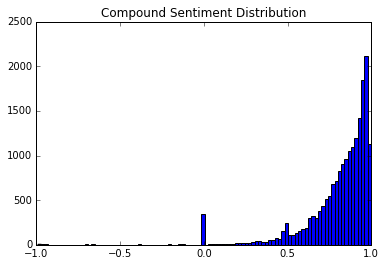

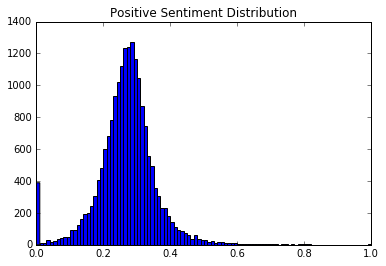

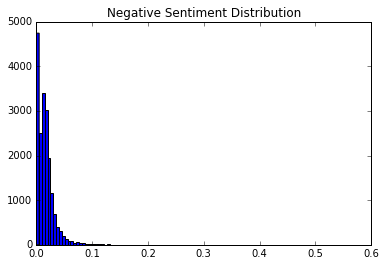

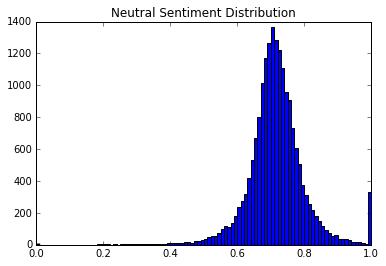

In [27]:
#distribution of reviews (averaged by id)
plt.figure()
plt.title("Compound Sentiment Distribution")
plt.hist(sentiments_by_id["compound_sentiment"], bins=100);

plt.figure()
plt.title("Positive Sentiment Distribution")
plt.hist(sentiments_by_id["positive_sentiment"], bins=100);

plt.figure()
plt.title("Negative Sentiment Distribution")
plt.hist(sentiments_by_id["negative_sentiment"], bins=100);

plt.figure()
plt.title("Neutral Sentiment Distribution")
plt.hist(sentiments_by_id["neutral_sentiment"], bins=100);

In [29]:
#merge with price
listings_clean = pd.read_csv("../../Data/listings_clean.csv")
listings_price = listings_clean[["id", "price"]]
combined_data = sentiments_by_id.merge(listings_price, left_on="listing_id", right_on="id")
combined_data.shape

(19025, 7)

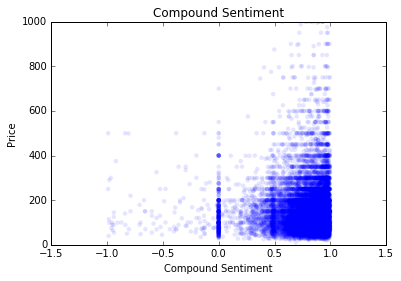

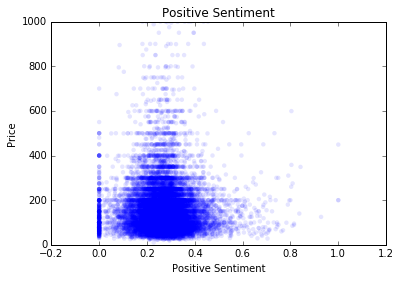

In [36]:
plt.figure()
plt.title("Compound Sentiment")
plt.xlabel("Compound Sentiment")
plt.ylabel("Price")
plt.ylim((0, 1000))
plt.scatter(combined_data["compound_sentiment"], combined_data["price"], alpha=0.1, edgecolors='none');

plt.figure()
plt.title("Positive Sentiment")
plt.xlabel("Positive Sentiment")
plt.ylabel("Price")
plt.ylim((0, 1000))
plt.scatter(combined_data["positive_sentiment"], combined_data["price"], alpha=0.1, edgecolors='none');

In [47]:
import statsmodels.api as sm
x = combined_data[["compound_sentiment", "positive_sentiment", "negative_sentiment", "neutral_sentiment"]]
y = combined_data[["price"]]
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.663
Date:                Sun, 11 Dec 2016   Prob (F-statistic):           0.000150
Time:                        10:59:14   Log-Likelihood:            -1.1844e+05
No. Observations:               19025   AIC:                         2.369e+05
Df Residuals:                   19020   BIC:                         2.369e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const                208.0097     77.792      2.674      0.008        55.531   360.488
compound_sentiment    22.9149      5.485      4.178      0.000        12.163    33.667
positive_sentiment  -112.2952     78.783     -1.425      0.154      -266.716    42.126
negative_sentiment   -58.5209     91.914     -0.637      0.524      -238.681   121.639
neutral_sentiment    -59.0686     77.896     -0.758      0.448      -211.752    93.614
==============================================================================
Omnibus:                    30859.755   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         61605992.393
Skew:                          10.276   Prob(JB):                         0.00
Kurtosis:                     281.017   Cond. No.                         266.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Review sentiment score does not appear to affect price on its own.